In [22]:
#Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# define early stopping layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
train_dir ='Dataset/seg_train/seg_train'
test_dir ='Dataset/seg_test/seg_test'

In [24]:
batch_size =32
image_size = (150,150)
epoch=30

In [25]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=image_size,
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.


In [26]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=image_size,
  batch_size=batch_size)

Found 3000 files belonging to 6 classes.


In [27]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [29]:
num_classes = 6

In [30]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(150,150,3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

In [32]:
history = model.fit(train_ds, validation_data=test_ds,epochs=epoch)

Epoch 1/30
439/439 [==============================] - 30s 51ms/step - loss: 0.9410 - accuracy: 0.6360 - val_loss: 0.6917 - val_accuracy: 0.7550
Epoch 2/30
439/439 [==============================] - 5s 12ms/step - loss: 0.5982 - accuracy: 0.7845 - val_loss: 0.5784 - val_accuracy: 0.7877
Epoch 3/30
439/439 [==============================] - 4s 10ms/step - loss: 0.4591 - accuracy: 0.8335 - val_loss: 0.4920 - val_accuracy: 0.8343
Epoch 4/30
439/439 [==============================] - 4s 10ms/step - loss: 0.3438 - accuracy: 0.8760 - val_loss: 0.5028 - val_accuracy: 0.8393
Epoch 5/30
439/439 [==============================] - 4s 10ms/step - loss: 0.2544 - accuracy: 0.9116 - val_loss: 0.6315 - val_accuracy: 0.7923
Epoch 6/30
439/439 [==============================] - 4s 10ms/step - loss: 0.1686 - accuracy: 0.9421 - val_loss: 0.6298 - val_accuracy: 0.8257
Epoch 7/30
439/439 [==============================] - 4s 10ms/step - loss: 0.1112 - accuracy: 0.9637 - val_loss: 0.8198 - val_accuracy: 0.805

In [33]:
df=pd.DataFrame(history.history)
df['epochs']=history.epoch
df

,loss,accuracy,val_loss,val_accuracy,epochs
0,0.941014,0.635956,0.691689,0.755000,0
1,0.598168,0.784452,0.578444,0.787667,1
2,0.459056,0.833476,0.492026,0.834333,2
3,0.343815,0.876015,0.502753,0.839333,3
4,0.254408,0.911572,0.631472,0.792333,4
5,0.168647,0.942069,0.629808,0.825667,5
6,0.111179,0.963660,0.819757,0.805000,6
7,0.091300,0.971355,0.895417,0.807333,7
8,0.058859,0.980405,0.978633,0.812667,8
9,0.053388,0.983397,1.114673,0.796000,9


Text(0, 0.5, 'loss')

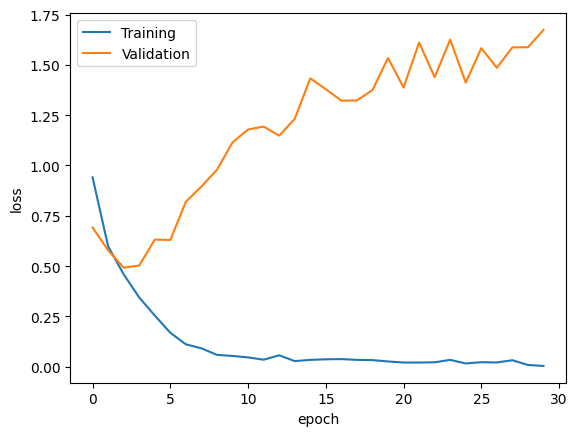

In [34]:
#visualize the model performance
import matplotlib.pyplot as plt
plt.plot(df['loss'], label ='Training')
plt.plot(df['val_loss'], label ='Validation')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

In [37]:
model.evaluate(test_ds)

94/94 [==============================] - 1s 7ms/step - loss: 1.6735 - accuracy: 0.8167


[1.6735286712646484, 0.8166666626930237]

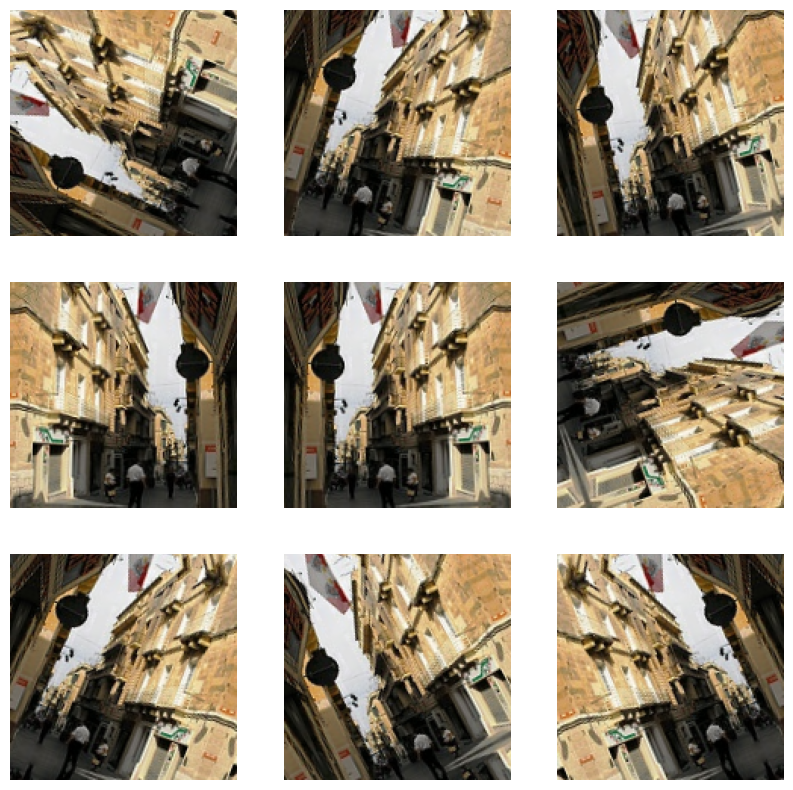

In [36]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])
for image, _ in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [4]:
#Define the parameters for data augumentation
train_datagen =ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, vertical_flip=True, shear_range=0.2, zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [5]:
train_generator =train_datagen.flow_from_directory(train_dir, target_size=(150,150),
                                                   batch_size=batch_size)
test_generator =test_datagen.flow_from_directory(test_dir, target_size=(150,150),
                                                 batch_size=batch_size)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [6]:
from tensorflow.keras.models import Model

In [ ]:
from keras.applications.resnet import ResNet50